In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
data=pd.read_csv('/content/diamonds_new.csv')

In [339]:
data.shape

(53940, 9)

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [341]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [342]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [343]:
data.tail()

,carat,cut,color,clarity,table,x,y,z,price_new
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5
53939,0.75,Ideal,D,SI2,55.0,5.83,5.87,3.64,1378.5


In [344]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [345]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

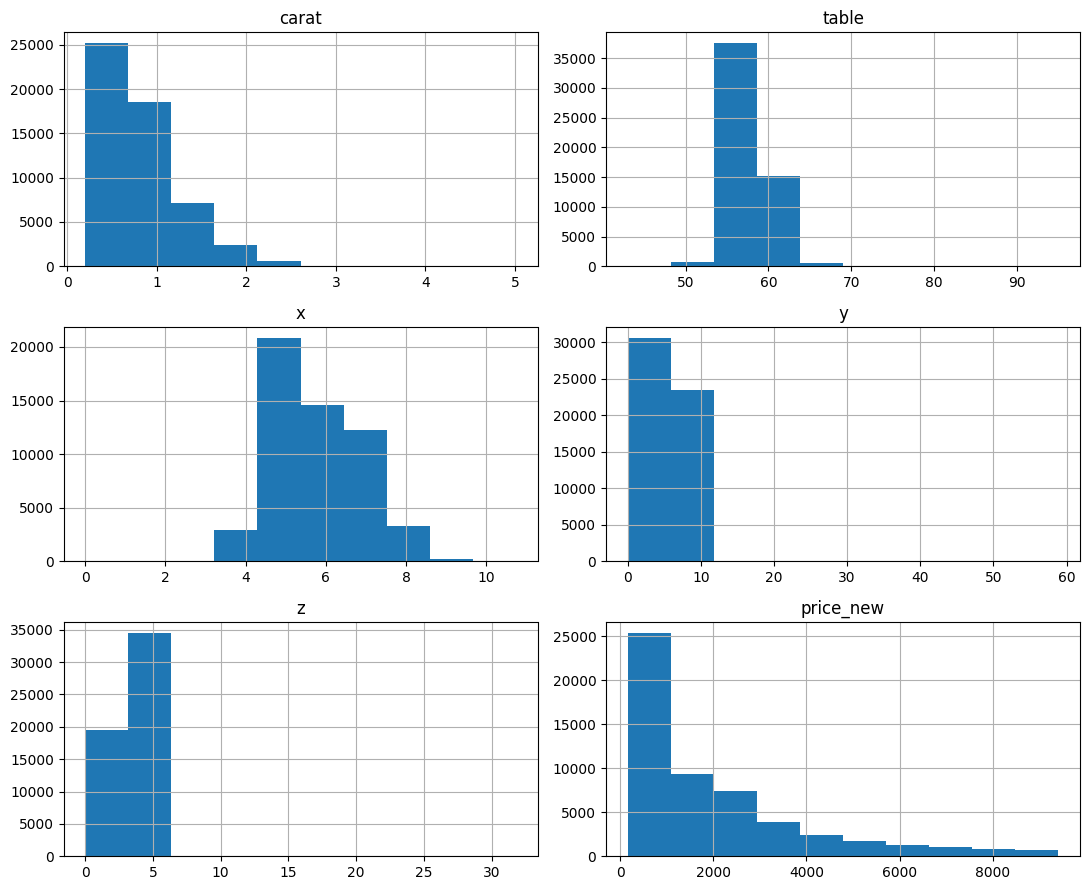

In [346]:
freqgraph=data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(11,9))
plt.tight_layout()
plt.show()

## 1. Missing values Handling

In [347]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

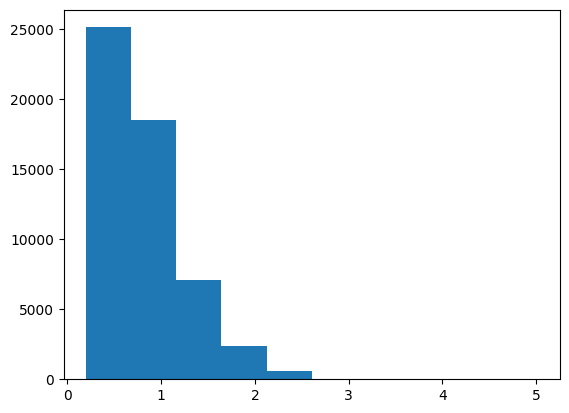

In [348]:
plt.hist(data['carat'])
plt.show()

In [349]:
median_carat=data['carat'].median()
data['carat'] = data['carat'].fillna(median_carat)

In [350]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

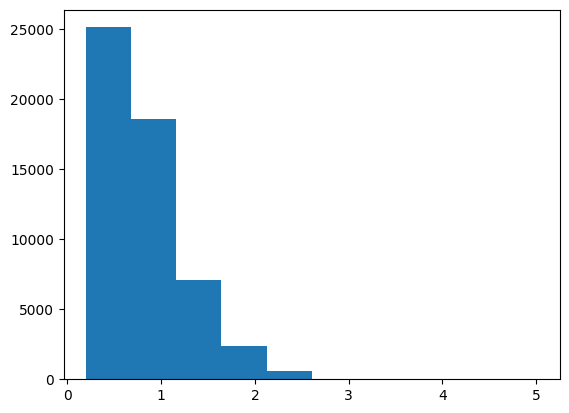

In [351]:
plt.hist(data['carat'])
plt.show()

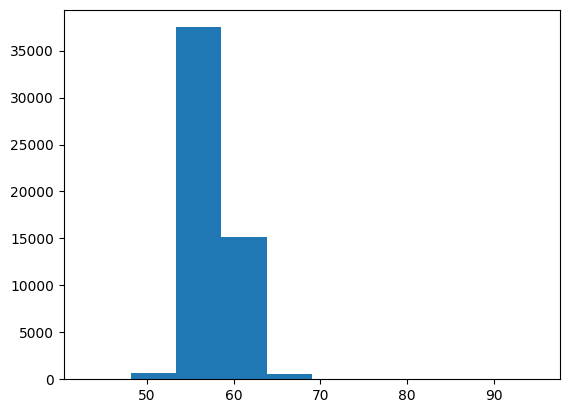

In [352]:
plt.hist(data['table'])
plt.show()

In [353]:
median_carat=data['table'].median()
data['table'] = data['table'].fillna(median_carat)

In [354]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [355]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', nan], dtype=object)

In [356]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [357]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [358]:
data['color'].astype('object')

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [359]:
data.value_counts(['color'])

color
G        11236
E         9797
F         9542
H         8304
D         6775
I         5422
J         2808
dtype: int64

In [360]:
mode_carat=data['color'].mode()
data['color'] = data['color'].fillna(mode_carat)

In [361]:
data.isna().sum()

carat         0
cut           0
color        56
clarity       0
table         0
x             0
y             0
z             0
price_new     0
dtype: int64

In [362]:
data['color'].fillna(data['color'].mode()[0], inplace=True)

In [363]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


## 2.Outlier Detection

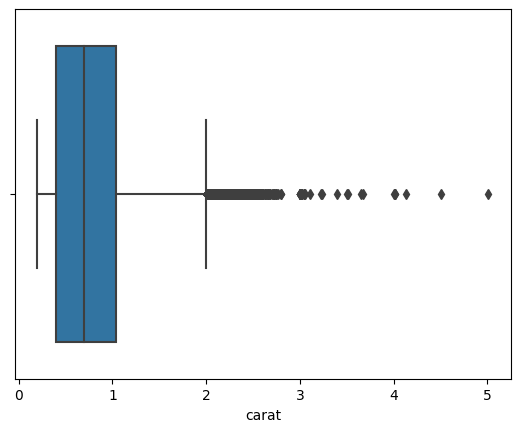

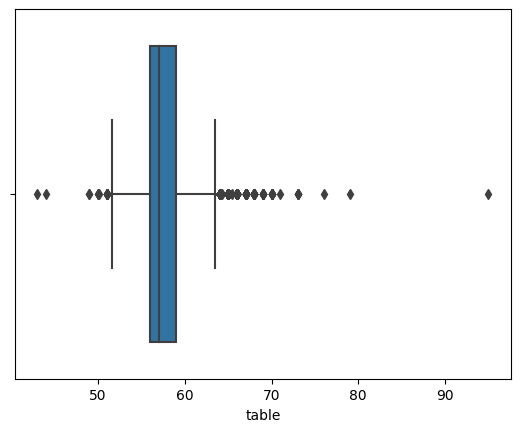

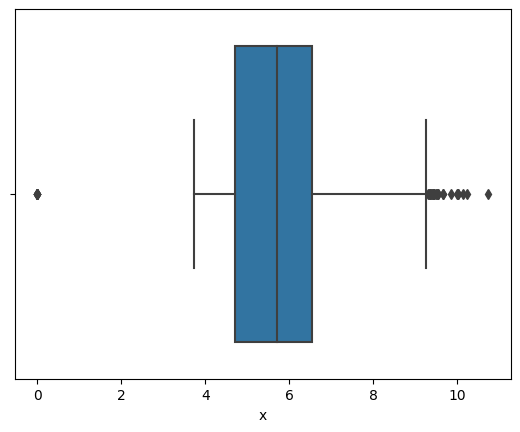

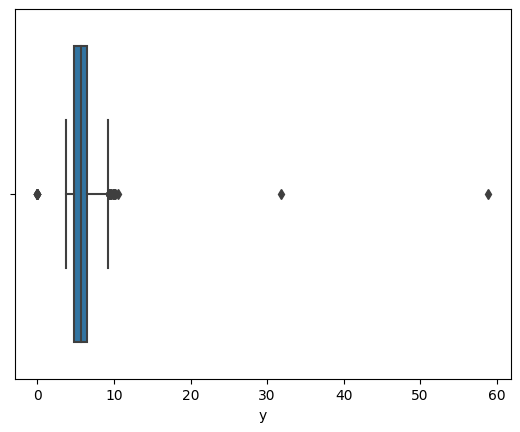

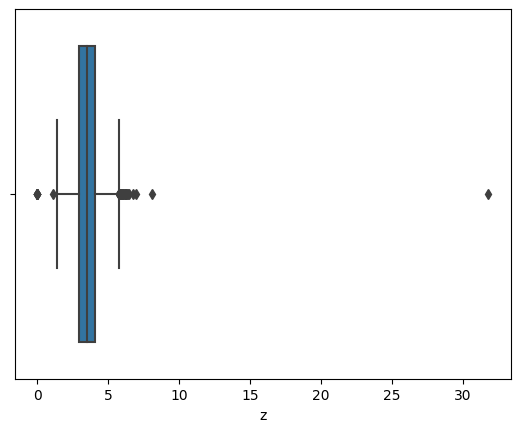

In [365]:
for i in ['carat','table','x','y', 'z']:
  sns.boxplot(x=data[i])
  plt.show()

In [366]:
for i in ['carat','table','x','y', 'z']:
#finding quartile values    
  Q1=np.percentile(data[i],25,interpolation='midpoint')
  Q2=np.percentile(data[i],50,interpolation='midpoint')
  Q3=np.percentile(data[i],75,interpolation='midpoint')
#finding the IQR    
  IQR=Q3-Q1    
#finding upper and lowe limits    
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
#finding outliers
  data.loc[data[i]<lower_limit, i] = lower_limit
  data.loc[data[i]>upper_limit, i] = upper_limit

<ipython-input-366-2283094b2ce1>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data[i],25,interpolation='midpoint')
<ipython-input-366-2283094b2ce1>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data[i],50,interpolation='midpoint')
<ipython-input-366-2283094b2ce1>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data[i],75,int

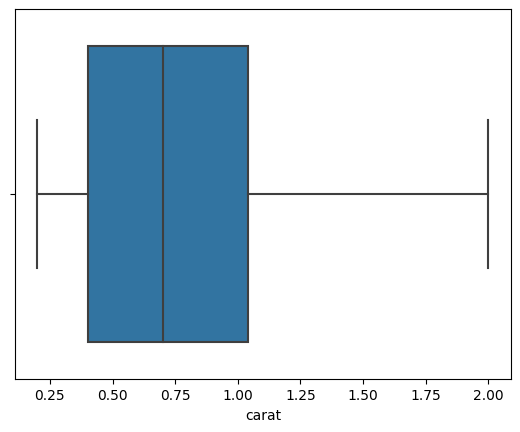

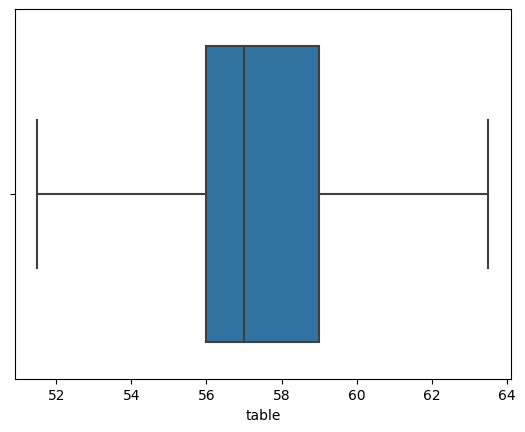

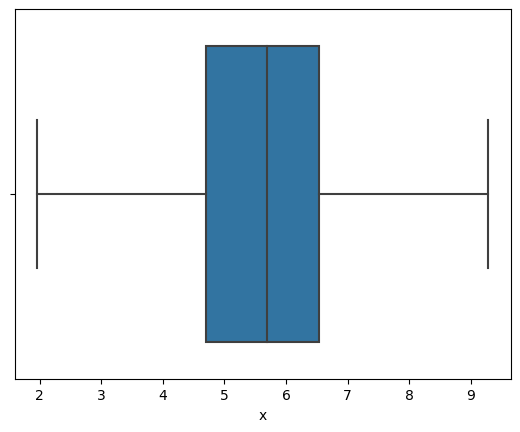

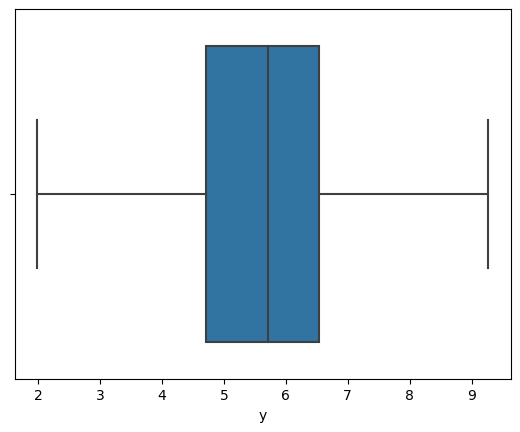

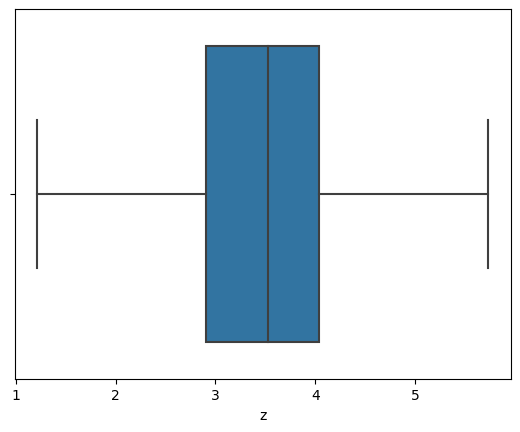

In [367]:
for i in ['carat','table','x','y', 'z']:
  sns.boxplot(x=data[i])
  plt.show()

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


## 3. Encoding

In [369]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [370]:
dict1 = {"Ideal":5, "Premium":4, "Very Good": 3 , "Good": 2, "Fair": 1 }

In [371]:
data["cut"] = data['cut'].map(dict1)

In [372]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,5,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,4,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,2,E,VS1,63.5,4.05,4.07,2.31,163.5
3,0.29,4,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,2,J,SI2,58.0,4.34,4.35,2.75,167.5


In [373]:
x = data.drop("price_new", axis=1)

In [374]:
y=data['price_new']

In [375]:
x

,carat,cut,color,clarity,table,x,y,z
0,0.23,5,E,SI2,55.0,3.95,3.98,2.43
1,0.21,4,E,SI1,61.0,3.89,3.84,2.31
2,0.23,2,E,VS1,63.5,4.05,4.07,2.31
3,0.29,4,I,VS2,58.0,4.20,4.23,2.63
4,0.31,2,J,SI2,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,5,D,SI1,57.0,5.75,5.76,3.50
53936,0.72,2,D,SI1,55.0,5.69,5.75,3.61
53937,0.70,3,D,SI1,60.0,5.66,5.68,3.56
53938,0.86,4,H,SI2,58.0,6.15,6.12,3.74


In [376]:
data['cut'].unique()

array([5, 4, 2, 3, 1])

In [377]:
x = pd.get_dummies(x)

In [378]:
x

,carat,cut,table,x,y,z,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,63.5,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,58.0,4.20,4.23,2.63,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,58.0,4.34,4.35,2.75,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,57.0,5.75,5.76,3.50,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,60.0,5.66,5.68,3.56,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,58.0,6.15,6.12,3.74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# 4.Scaling

In [379]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler(x)

In [381]:
x.describe()

,carat,cut,table,x,y,z,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,3.904097,57.438561,5.731285,5.733311,3.539131,0.125603,0.181628,0.176900,0.209344,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.457089,1.116600,2.161139,1.119956,1.111950,0.691776,0.331404,0.385541,0.381588,0.406844,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,1.000000,51.500000,1.965000,1.990000,1.215000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,56.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,4.000000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,5.000000,59.000000,6.540000,6.540000,4.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,5.000000,63.500000,9.285000,9.270000,5.735000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
